##M Levine Weather Py 09_082018
###UCI Data Analytics Bootcamp

# WeatherPy
----

###Observations and Analysis
It is clear that Latitude--which runs up and down on the Earth (Equator is at 0 degrees Latitude)--as our independent variable explains quite a few weather patterns:
First, the closer to the equator, the higher average temperature. We can see this in our graph above. We plotted a linear regression line through this plot which did not fit our data very well leading us to the conclusion that the relationship between latitude and temperature may not be linear. We may be able to fit the relationship with a Loess transformation. 

Second, in concert with higher average temperatures, being closer to the equator affords its resident with a bit of water in the form of humudity. So, closer to the equator equates to hotter days and more sweating! 

Next, it tends to be cloudier towards the poles: at +60 to +90 degrees latitude, there is more cloudiness. However, this cloudiness trend is not as easily observable throughout our plot as the temperature and humidity variables. 



In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd
import numpy as np
import requests
from datetime import date
import plotly.plotly as py
import plotly.graph_objs as go
from numpy import arange,array,ones
from scipy import stats

# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; we set our seed at 123 so we can reproduce the same output later!
np.random.seed(123)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(city)
#for some reason one city is popping out so i need to delete
#it; when i merge the lists into a data frame, they all need to be the same length
del city


jamestown


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### We need to bring in the following:


*Temperature (F) vs. Latitude
*Humidity (%) vs. Latitude
*Cloudiness (%) vs. Latitude
*Wind Speed (mph) vs. Latitude

**This is what one successful API call looks like; the code is 200. Because of that, we need to filter for 200s only
using an IF ELSE statement:
print(response){'coord': {'lon': 67.39, 'lat': 56.82}, 'weather': {'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.92, 'pressure': 1016.13, 'humidity': 77, 'temp_min': 53.92, 'temp_max': 53.92, 'sea_level': 1025.92, 'grnd_level': 1016.13}, 'wind': {'speed': 5.59, 'deg': 260.503}, 'clouds': {'all': 8}, 'dt': 1536451174, 'sys': {'message': 0.0091, 'country': 'RU', 'sunrise': 1536367710, 'sunset': 1536415554}, 'id': 1485712, 'name': 'Yurginskoye', 'cod': 200}


In [55]:
#loop through the list of cities and perform a request for data on each
#Let's store our vital api call objects:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
cities_list = []
lat = []
long = []
temp = []
max_temp = []
min_temp = []
Humidity = []
Wind_Speed =  []
Cloudiness = []
counter = 0 


#This is the crux of the code in this exercise. We need to first create a for loop which 
#attempts to ping/find any given city from our citipy cities list (up to 1,500 randomly chosen cities above)
#with the OpenWeather API. There is a major issue with this because the API does not contain some of the randomly
#chosen cities from our cities list above! So, we need to insert an if else statement which looks for a successful 
#or cod = 200, call. If if finds it, we print that we successfully found a city with Open Weather. Then,

for city in cities:
    response = requests.get(query_url+city).json()
    
    if response['cod'] == 200:
        print(f"Successfully loading {counter} of {len(cities)} total possible cities; please wait! :)")
        counter += 1
        cities_list.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        
    else:
        print("Skip city, going onto next")
        
        
        
    


#Cities_dataframe = pd.DataFrame({"Cities": cities,
 #                               "Lat": lat})



Successfully loading 0 of 606 total possible cities; please wait! :)
Successfully loading 1 of 606 total possible cities; please wait! :)
Successfully loading 2 of 606 total possible cities; please wait! :)
Successfully loading 3 of 606 total possible cities; please wait! :)
Successfully loading 4 of 606 total possible cities; please wait! :)
Successfully loading 5 of 606 total possible cities; please wait! :)
Successfully loading 6 of 606 total possible cities; please wait! :)
Skip city, going onto next
Successfully loading 7 of 606 total possible cities; please wait! :)
Successfully loading 8 of 606 total possible cities; please wait! :)
Successfully loading 9 of 606 total possible cities; please wait! :)
Successfully loading 10 of 606 total possible cities; please wait! :)
Successfully loading 11 of 606 total possible cities; please wait! :)
Successfully loading 12 of 606 total possible cities; please wait! :)
Successfully loading 13 of 606 total possible cities; please wait! :)
Suc

Successfully loading 114 of 606 total possible cities; please wait! :)
Successfully loading 115 of 606 total possible cities; please wait! :)
Successfully loading 116 of 606 total possible cities; please wait! :)
Successfully loading 117 of 606 total possible cities; please wait! :)
Skip city, going onto next
Successfully loading 118 of 606 total possible cities; please wait! :)
Successfully loading 119 of 606 total possible cities; please wait! :)
Successfully loading 120 of 606 total possible cities; please wait! :)
Successfully loading 121 of 606 total possible cities; please wait! :)
Skip city, going onto next
Successfully loading 122 of 606 total possible cities; please wait! :)
Successfully loading 123 of 606 total possible cities; please wait! :)
Successfully loading 124 of 606 total possible cities; please wait! :)
Successfully loading 125 of 606 total possible cities; please wait! :)
Successfully loading 126 of 606 total possible cities; please wait! :)
Successfully loading 12

Successfully loading 223 of 606 total possible cities; please wait! :)
Successfully loading 224 of 606 total possible cities; please wait! :)
Successfully loading 225 of 606 total possible cities; please wait! :)
Successfully loading 226 of 606 total possible cities; please wait! :)
Successfully loading 227 of 606 total possible cities; please wait! :)
Successfully loading 228 of 606 total possible cities; please wait! :)
Successfully loading 229 of 606 total possible cities; please wait! :)
Successfully loading 230 of 606 total possible cities; please wait! :)
Successfully loading 231 of 606 total possible cities; please wait! :)
Successfully loading 232 of 606 total possible cities; please wait! :)
Successfully loading 233 of 606 total possible cities; please wait! :)
Successfully loading 234 of 606 total possible cities; please wait! :)
Successfully loading 235 of 606 total possible cities; please wait! :)
Successfully loading 236 of 606 total possible cities; please wait! :)
Succes

Successfully loading 334 of 606 total possible cities; please wait! :)
Successfully loading 335 of 606 total possible cities; please wait! :)
Successfully loading 336 of 606 total possible cities; please wait! :)
Successfully loading 337 of 606 total possible cities; please wait! :)
Successfully loading 338 of 606 total possible cities; please wait! :)
Successfully loading 339 of 606 total possible cities; please wait! :)
Successfully loading 340 of 606 total possible cities; please wait! :)
Successfully loading 341 of 606 total possible cities; please wait! :)
Successfully loading 342 of 606 total possible cities; please wait! :)
Successfully loading 343 of 606 total possible cities; please wait! :)
Successfully loading 344 of 606 total possible cities; please wait! :)
Successfully loading 345 of 606 total possible cities; please wait! :)
Successfully loading 346 of 606 total possible cities; please wait! :)
Successfully loading 347 of 606 total possible cities; please wait! :)
Succes

Successfully loading 445 of 606 total possible cities; please wait! :)
Successfully loading 446 of 606 total possible cities; please wait! :)
Successfully loading 447 of 606 total possible cities; please wait! :)
Successfully loading 448 of 606 total possible cities; please wait! :)
Successfully loading 449 of 606 total possible cities; please wait! :)
Successfully loading 450 of 606 total possible cities; please wait! :)
Successfully loading 451 of 606 total possible cities; please wait! :)
Successfully loading 452 of 606 total possible cities; please wait! :)
Successfully loading 453 of 606 total possible cities; please wait! :)
Successfully loading 454 of 606 total possible cities; please wait! :)
Successfully loading 455 of 606 total possible cities; please wait! :)
Successfully loading 456 of 606 total possible cities; please wait! :)
Successfully loading 457 of 606 total possible cities; please wait! :)
Successfully loading 458 of 606 total possible cities; please wait! :)
Succes

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:

cities_df = pd.DataFrame({"Cities": cities_list,
                          "Lat": lat,
                          "Long": long,
                          "Temp":temp,
                          "Humidity": Humidity,
                          "Wind Speed": Wind_Speed,
                          "Cloudiness": Cloudiness})
cities_df.head()
cities_df.tail()


542

In [64]:
cities_df.to_csv("WeatherPy_ML.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
##### Generated linear fit
---
While atmospheric relationships are hardly ever linear, we will attempt to draw a linear line through each of our
plots. This does not mean that we believe the relationship is linear; rather, linear regression is a basic and handy tool
to first test our data's relationship with each other. In each of the plots we will graph the linear regression line of best fit; R squared and other items are not going to be analyzed in this exercise but at first glance, our goodness of fit would be quite low. 


-0.12785736150554294
2018-09-08 hooray
2018-09-08 19:41:44.041033


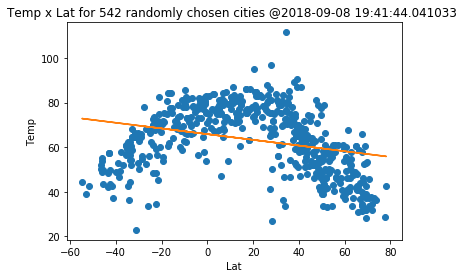

In [126]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Temp"])
line = slope*cities_df["Lat"]+intercept
print(slope)
now = datetime.datetime.now()
today = date.today()

plt.plot(cities_df["Lat"],cities_df["Temp"],'o',cities_df["Lat"] , line)
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.title(f'Temp x Lat for {len(cities_df)} randomly chosen cities as of {today} ')

plt.savefig('Temp as Function of Latitude.png')

#### Latitude vs. Humidity Plot

Text(0.5,1,'Humidity (y) as function of Latitude (x) for 542 randomly chosen cities @ 2018-09-08 18:46:40.625906')

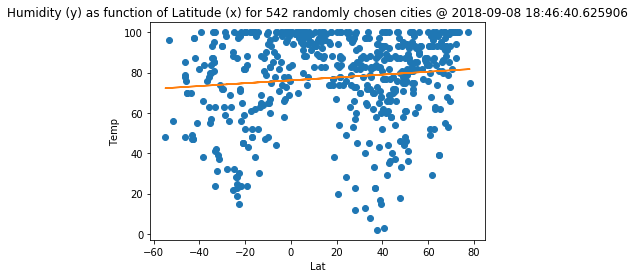

In [100]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Humidity"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Humidity"],'o',cities_df["Lat"],line_cloud)
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.title(f'Humidity (y) x Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Humidity as Function of Latitude.png')

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'Cloudiness x Latitude for 542 randomly chosen cities as of 2018-09-08')

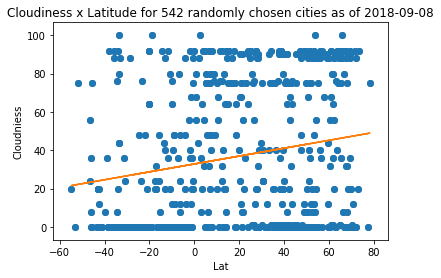

In [128]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Cloudiness"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Cloudiness"],'o',cities_df["Lat"],line_cloud)

plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel('Lat')
plt.ylabel('Cloudniess')
plt.title(f'Cloudiness x Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Cloudiness as Function of Latitude.png')

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'Windspeed by Latitude for 542 randomly chosen cities as of 2018-09-08')

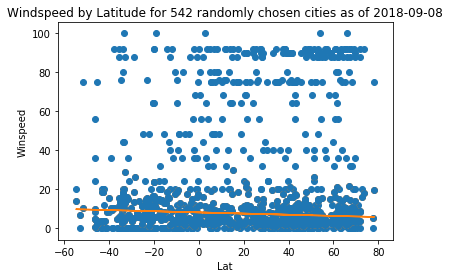

In [129]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Wind Speed"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Wind Speed"],'o',cities_df["Lat"],line_cloud)

plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel('Lat')
plt.ylabel('Cloudniess')
plt.title(f'Cloudiness (y) as function of Latitude (x) for {len(cities_df)} randomly chosen cities ')
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"])
plt.xlabel('Lat')
plt.ylabel('Winspeed')
plt.title(f'Windspeed by Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Windspeed as Function of Latitude.png')